# <span style="color:#73aafa">Chicago Crimes - SQL - Python - Power BI - Analysis </span> 

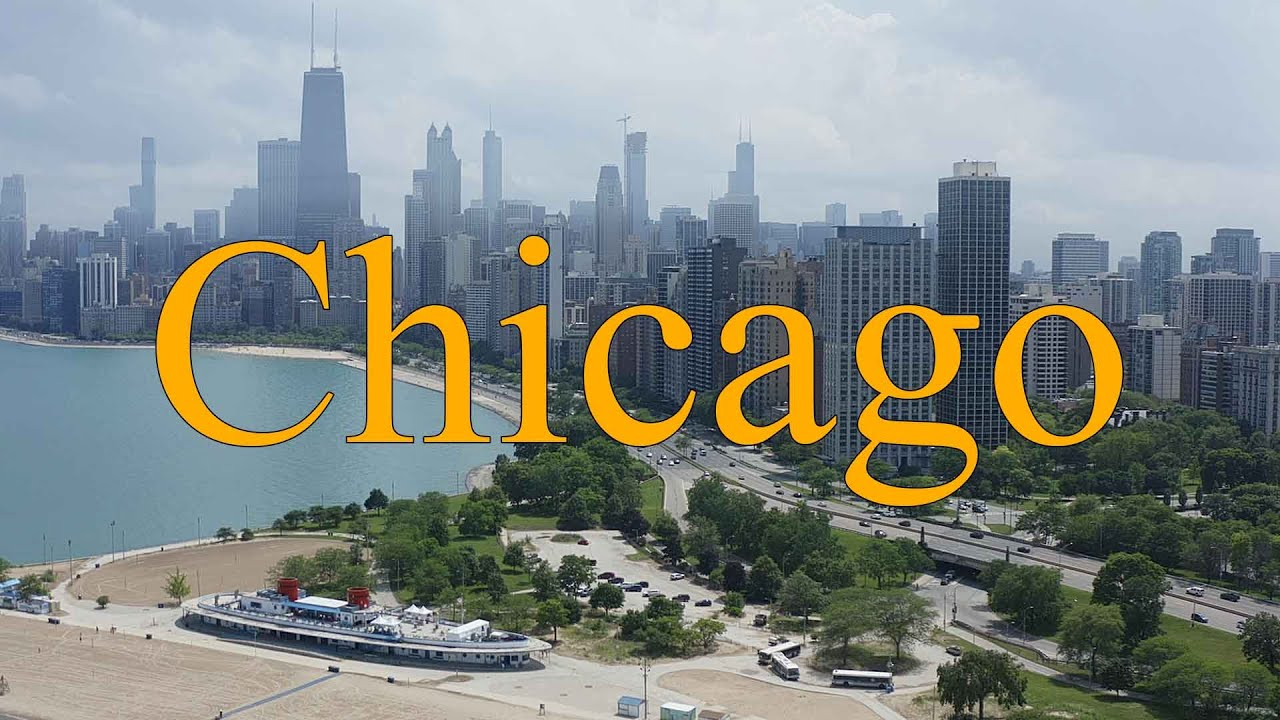

# <span style="color:#73aafa">1. Connect with BigQuery </span> 

<b>Connect with the BigQuery, import libraries</b>

In [1]:
import calendar
from csv import writer
from google.cloud import bigquery

client = bigquery.Client()

# Perform a query.
#QUERY = (
#    'SELECT unique_key, case_number, date,primary_type, description, location_description, arrest, domestic, fbi_code, year FROM `bigquery-public-data.chicago_crime.crime` '
#    'WHERE year > 2018  '
#    'LIMIT 2')

   

Using Kaggle's public dataset BigQuery integration.


# <span style="color:#73aafa">2. SQL Query </span> 
<b>
We'll be using the Chicago Crime dataset, which contains information around crimes cases in ChicagoChicago.<p>
The table is `bigquery-public-data.chicago_crime.crime` <p>
The table contains a huge amount of data. For this reason we will group the records per crimes case, month and year.<p>
Perform SQL query. Select COUNT(case_number) AS num_case, primary_type, domestic, arrest, year for all years.<p>
Count crime cases per year. Extract month from date.<p>
</b>

In [2]:
# Perform a query. Select data for all years
# Count crime cases per year
# Extract month from date

QUERY = (
    'SELECT COUNT(case_number) AS num_case, primary_type, domestic, arrest, year, EXTRACT(MONTH FROM date) AS month '
    'FROM `bigquery-public-data.chicago_crime.crime` '
    'GROUP BY year, month, primary_type, domestic, arrest '
    'ORDER BY year DESC, num_case DESC'
    )
query_job = client.query(QUERY)  # API request
rows = query_job.result()  # Waits for query to finish

cells_text= ['num_case','primary_type','arrest', 'domestic','year', 'month', 'month_name']

#Code for row checkig
#for row in rows:
#    print(row.num_case, row.primary_type, row.year)

# <span style="color:#73aafa">3. Save data to csv file</span> 
<b>
Import month name into dataset using calendar.month_name() and save data to crime_count.csv file .<p>
</b>


In [3]:
# Save data to csv file
# Import month name using calendar.month_name

with open('crime_count.csv','w', encoding='utf8',newline='') as f:
    thewriter = writer(f)
    header = ['num_case','primary_type','arrest','domestic','year', 'month', 'month_name']
    thewriter.writerow(header)
    
    for row in rows:
        #cells = row.find_all(['td','th'])
        cells_text = [row.num_case,row.primary_type,row.arrest,row.domestic, row.year, row.month, calendar.month_name[row.month]]
        thewriter.writerow(cells_text)

<b>
The exported file can be imported in Power BI or Tableau for further data analysis and Data visualization.<p>
You can also use Python or R for for further data analysis and Data visualization.<p>
</b>

# <span style="color:#73aafa">4. Data Visualization</span> 

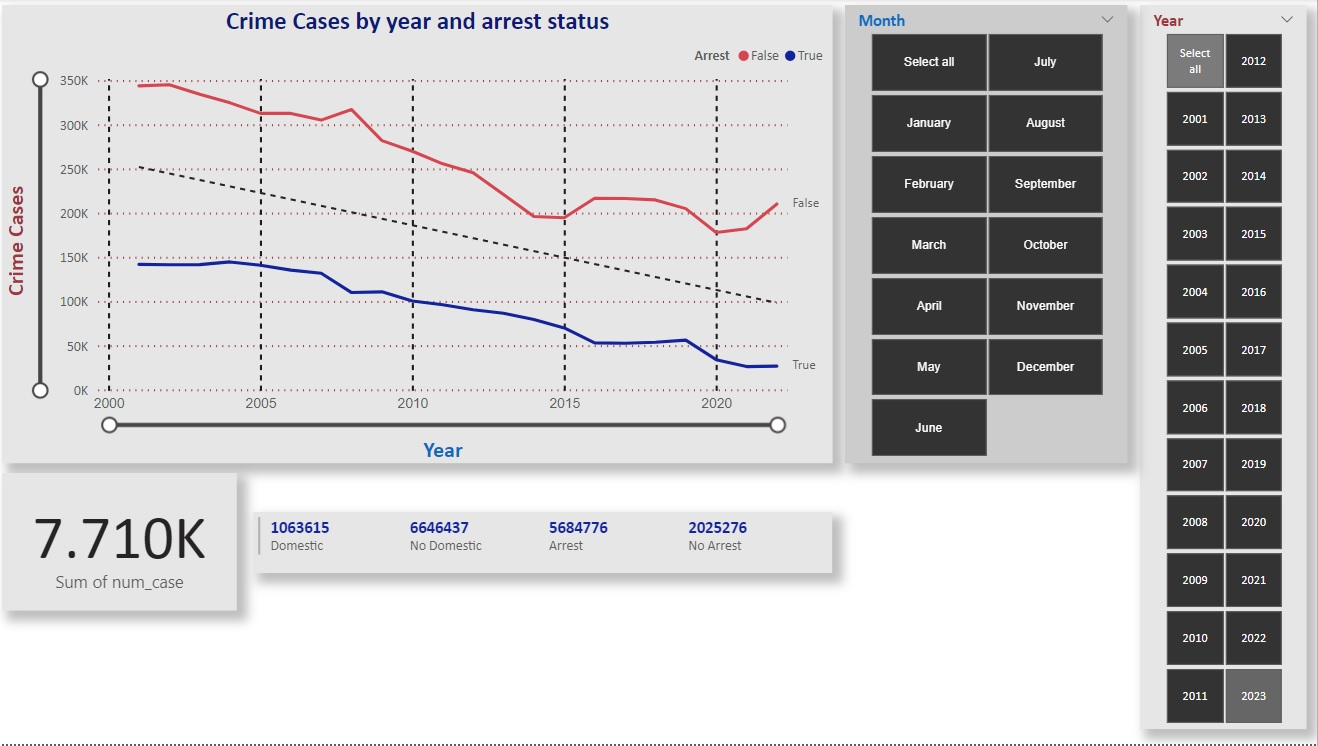

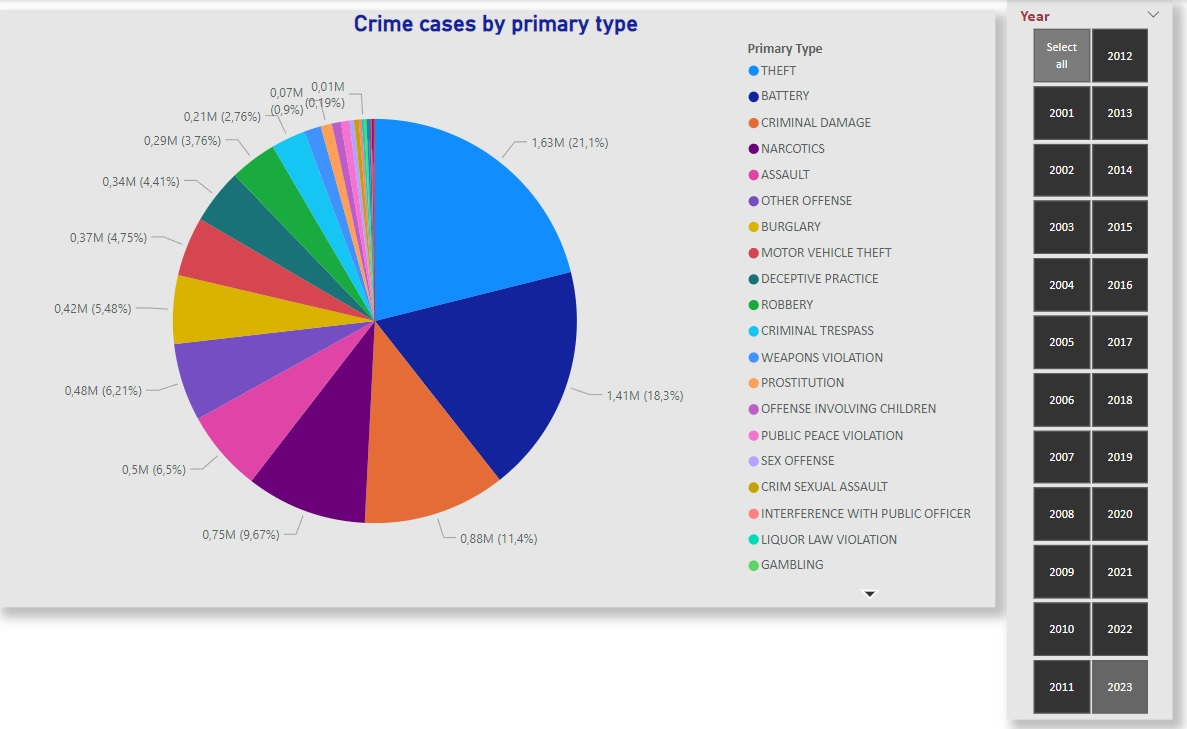

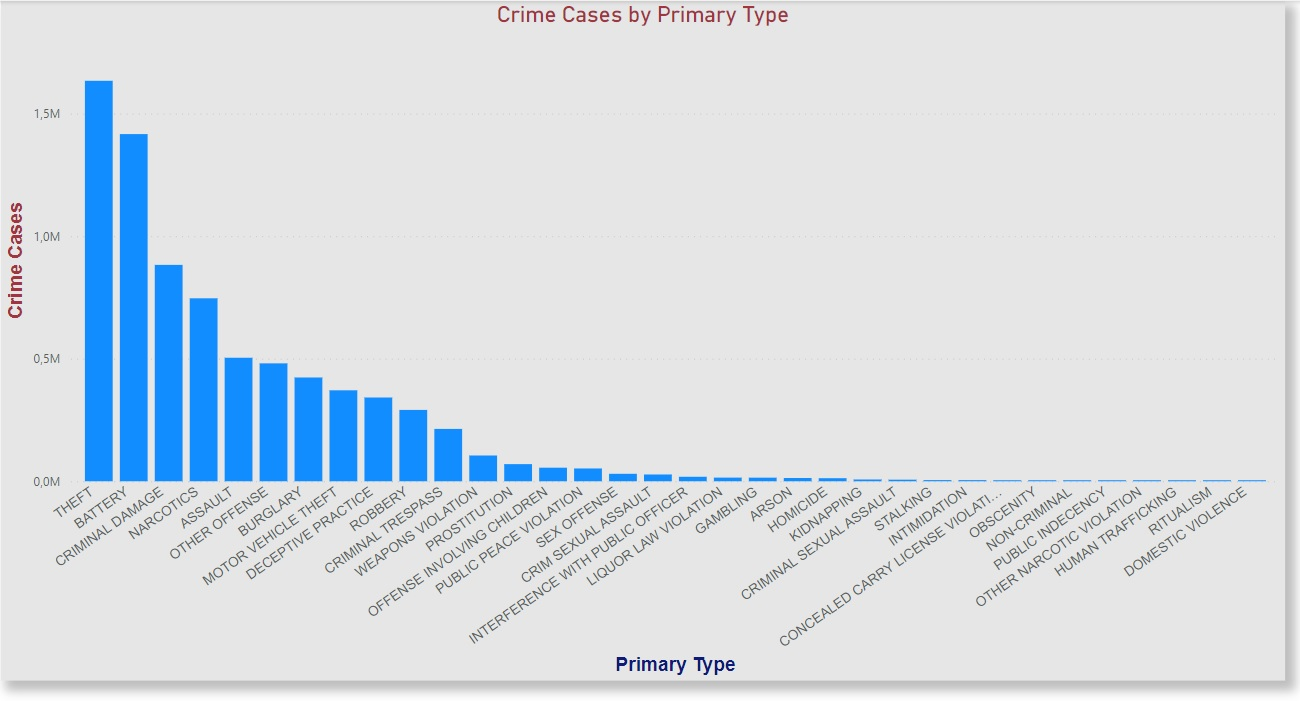

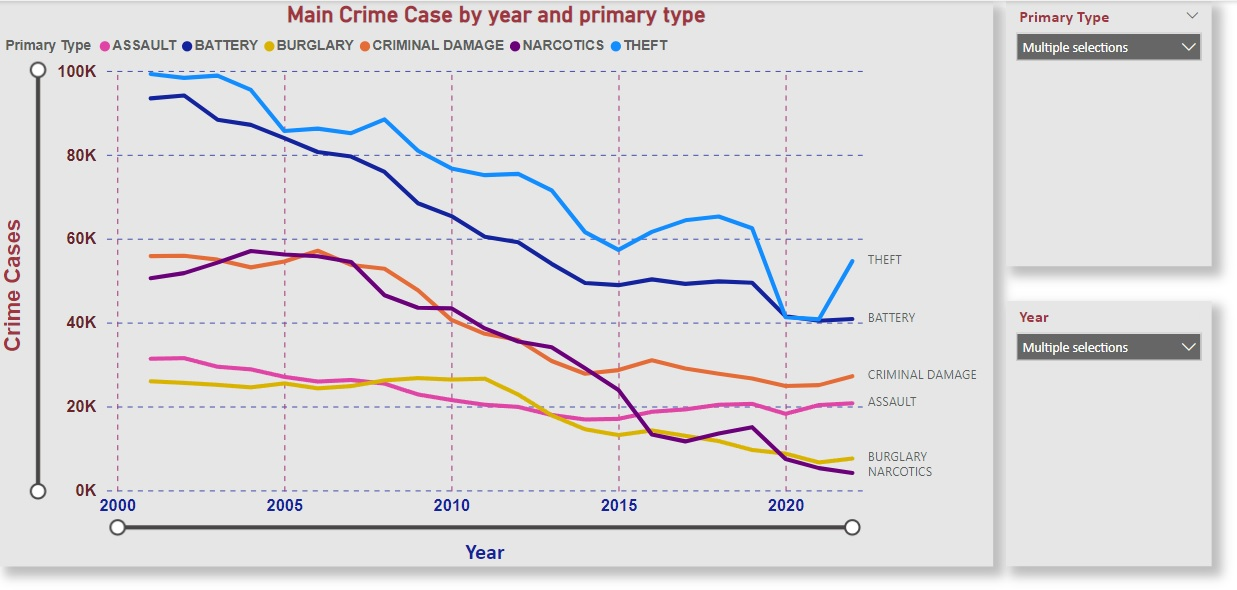

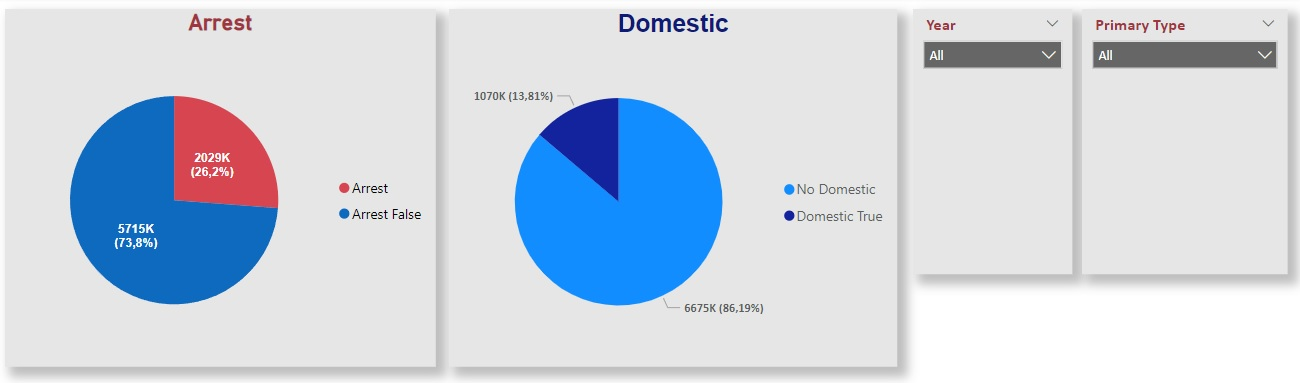